In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats.distributions import norm

In [7]:
populations = 10000 * np.arange(1, 6)
populations = [58000, 876000, 7400, 34200, 117000, 749000]

n_islands = len(populations)
islands = np.arange(1, n_islands+1)

def get_population(island):
    if island < 1 or island > n_islands:
        return 0
    else:
        return populations[island-1]

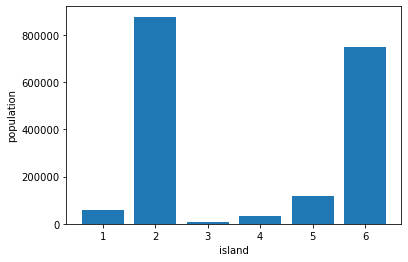

In [8]:
plt.bar(islands, [get_population(island) for island in islands])
plt.ylabel('population')
plt.xlabel('island');

In [9]:
current_island = np.random.choice(islands)

print(current_island)

1


In [10]:
def acceptance_probability(current_pop, proposed_pop):
    return min([proposed_pop/current_pop, 1.])

In [11]:
proposed_island = current_island + np.random.choice([-1, 1])

current_population = get_population(current_island)
proposed_population = get_population(proposed_island)
acc_prob = acceptance_probability(current_population, proposed_population)

print(current_population)
print(proposed_population)
print(acc_prob)

58000
876000
1.0


In [12]:
islands_visited = [current_island]

In [13]:
draw = np.random.uniform(0, 1)
if draw < acc_prob:
    current_island = proposed_island

islands_visited.append(current_island)

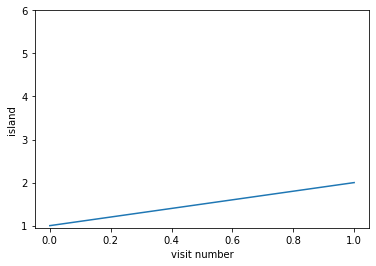

In [14]:
plt.plot(islands_visited)
plt.yticks(islands)
plt.xlabel('visit number')
plt.ylabel('island');

In [15]:
nsteps = 100000

for i in range(nsteps):
    proposed_island = current_island + np.random.choice([-1, 1])
    current_population = get_population(current_island)
    proposed_population = get_population(proposed_island)
    acc_prob = acceptance_probability(current_population, proposed_population)
    
    draw = np.random.uniform(0, 1)
    if draw < acc_prob:
        current_island = proposed_island
    islands_visited.append(current_island)

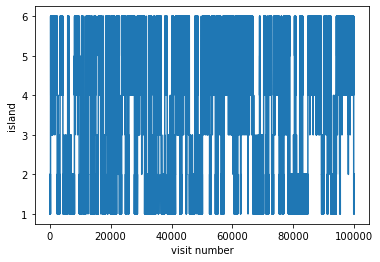

In [16]:
plt.plot(islands_visited)
plt.yticks(islands)
plt.xlabel('visit number')
plt.ylabel('island');

<BarContainer object of 6 artists>

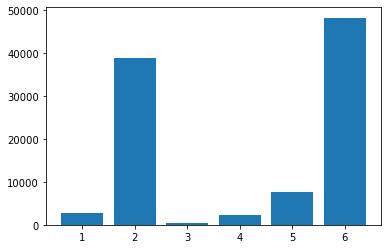

In [17]:
freqs = [np.count_nonzero(np.array(islands_visited)==island) for island in islands]
plt.bar(islands, freqs)

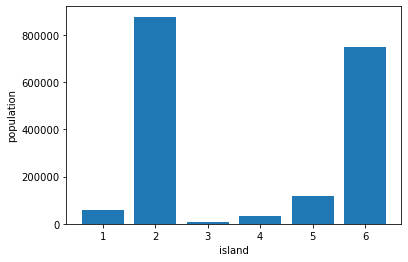

In [18]:
#The actual populations
plt.bar(islands, [get_population(island) for island in islands])
plt.ylabel('population')
plt.xlabel('island');

In [14]:
mu = 10
sigma = 2

def p(x):
    return .5*(norm.pdf(x, loc=mu, scale=sigma) + norm.pdf(x, loc=mu+5, scale=sigma/2))

In [15]:
x0 = -7

x = x0
p_current = p(x)

chain = [x]

In [18]:
niter = 10000
sigma_jump = 5

for i in range(niter):
    xp = norm.rvs(loc=x, scale=sigma_jump)
    p_prop = p(xp)
    acc_prob = p_prop / p_current
    u = np.random.uniform()
    accepted = u < acc_prob
    
    if accepted:
        x = xp
        p_current = p_prop
    chain.append(x)

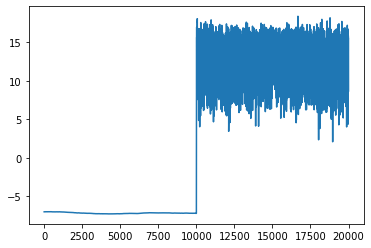

In [19]:
burnin = 0

plt.plot(chain[burnin:])

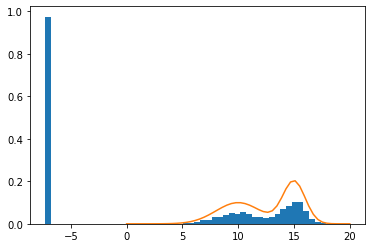

In [20]:
xs = np.linspace(0, 20)

plt.hist(chain[burnin:], bins=50, density=True)
plt.plot(xs, p(xs));